In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
ss = pd.read_csv('sample_submission_8RXa3c6.csv')
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [ ]:
train['source']='train'
test['source']='test'
df=pd.concat([train,test],ignore_index = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [ ]:
test.shape

(5681, 12)

In [ ]:
list(train)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'source']

In [ ]:
cols = [ 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Identifier'
 ]

for col in cols:
    print(f"\n{col}->\t{df[col].unique()}")


Item_Fat_Content->	['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type->	['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Establishment_Year->	[1999 2009 1998 1987 1985 2002 2007 1997 2004]

Outlet_Size->	['Medium' nan 'High' 'Small']

Outlet_Location_Type->	['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type->	['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']

Outlet_Identifier->	['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Lets look at our target distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

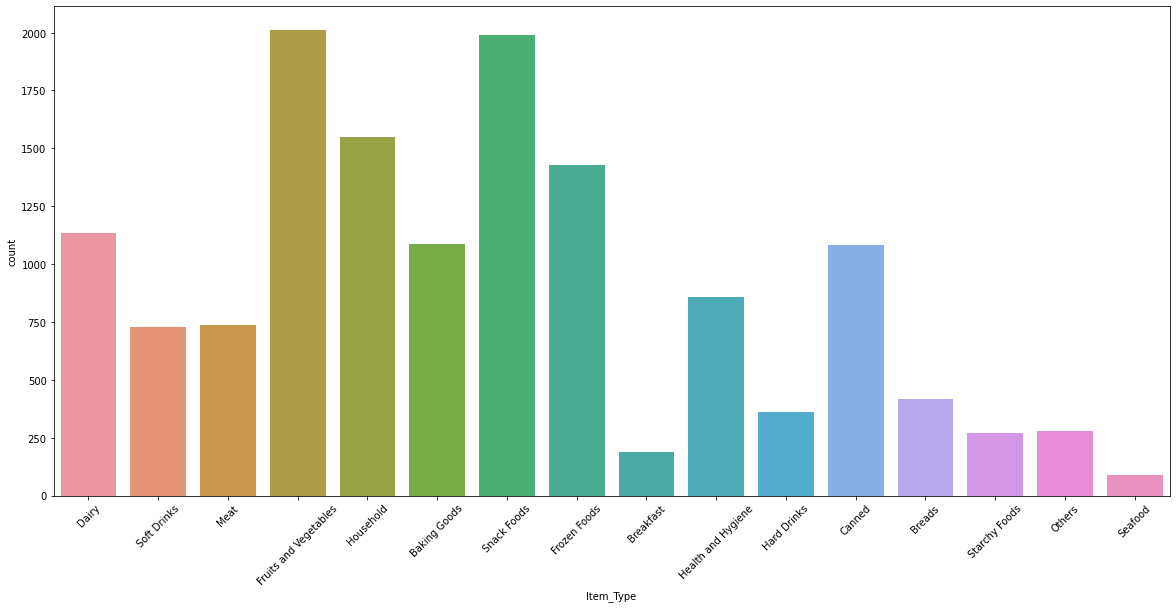

In [ ]:
plt.figure(figsize=[20,9])
sns.countplot(df['Item_Type'])
plt.xticks(rotation=45)

Fruits and Vegetables Category tops the list of nummber of items in all the shop outlets

In [ ]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})

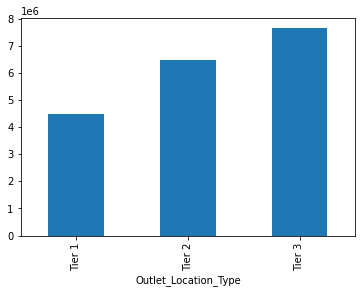

In [ ]:
df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum().plot.bar()
plt.show()

In [ ]:
df['Outlet_age']=2020-df['Outlet_Establishment_Year']

In [ ]:
df['Outlet_Size'].fillna('Unknown',inplace=True)

In [ ]:
out = df.groupby(by=['Outlet_Identifier','Outlet_Type','Outlet_Location_Type','Outlet_Size'])['Item_Outlet_Sales'].mean()
out

Outlet_Identifier  Outlet_Type        Outlet_Location_Type  Outlet_Size
OUT010             Grocery Store      Tier 3                Unknown         339.351662
OUT013             Supermarket Type1  Tier 3                High           2298.995256
OUT017             Supermarket Type1  Tier 2                Unknown        2340.675263
OUT018             Supermarket Type2  Tier 3                Medium         1995.498739
OUT019             Grocery Store      Tier 1                Small           340.329723
OUT027             Supermarket Type3  Tier 3                Medium         3694.038558
OUT035             Supermarket Type1  Tier 2                Small          2438.841866
OUT045             Supermarket Type1  Tier 2                Unknown        2192.384798
OUT046             Supermarket Type1  Tier 1                Small          2277.844267
OUT049             Supermarket Type1  Tier 1                Medium         2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df[df['Outlet_Size']=='Unknown'].groupby(['Outlet_Identifier'])['Outlet_Location_Type'].agg(pd.Series.mode)

Outlet_Identifier
OUT010    Tier 3
OUT017    Tier 2
OUT045    Tier 2
Name: Outlet_Location_Type, dtype: object

In [ ]:
df.groupby(['Outlet_Location_Type'])['Outlet_Size'].agg(pd.Series.mode)

Outlet_Location_Type
Tier 1      Small
Tier 2    Unknown
Tier 3     Medium
Name: Outlet_Size, dtype: object

In [ ]:
df.groupby(['Outlet_Location_Type'])['Outlet_Size'].agg(pd.Series.mode)

Outlet_Location_Type
Tier 1      Small
Tier 2    Unknown
Tier 3     Medium
Name: Outlet_Size, dtype: object

In [ ]:
df.groupby(['Outlet_Location_Type'])['Outlet_Type'].agg(pd.Series.mode)

Outlet_Location_Type
Tier 1    Supermarket Type1
Tier 2    Supermarket Type1
Tier 3    Supermarket Type3
Name: Outlet_Type, dtype: object

In [ ]:
df.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)

Outlet_Type
Grocery Store        Unknown
Supermarket Type1      Small
Supermarket Type2     Medium
Supermarket Type3     Medium
Name: Outlet_Size, dtype: object

In [ ]:
df.loc[(df['Outlet_Size']=='Unknown') & (df['Outlet_Identifier']=='OUT010') & (df['Outlet_Type']=='Grocery Store'),'Outlet_Size']='Medium'
df.loc[(df['Outlet_Size']=='Unknown') & (df['Outlet_Identifier']=='OUT045') & (df['Outlet_Type']=='Supermarket Type1'),'Outlet_Size']='Small'
df.loc[(df['Outlet_Size']=='Unknown') & (df['Outlet_Identifier']=='OUT017') & (df['Outlet_Type']=='Supermarket Type1'),'Outlet_Size']='Small'

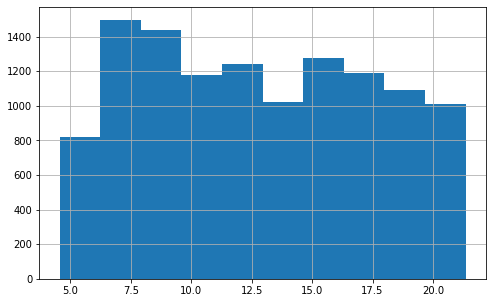

In [ ]:
df['Item_Weight'].hist(bins=10,figsize=(8,5))

In [ ]:
#Fill missing values of weight of Item According to means of Item Identifier
df['Item_Weight']=df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

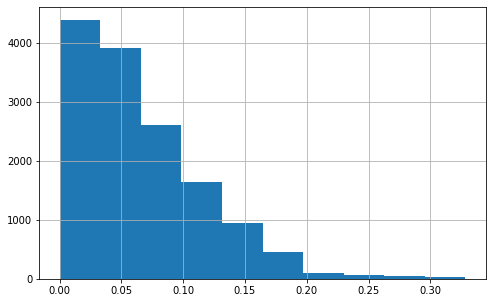

In [ ]:
df['Item_Visibility'].hist(bins=10,figsize=(8,5))

In [ ]:
df['Item_Visibility'].replace(0.00000,np.nan)#first fill by nam for simplicity
df['Item_Visibility'].fillna(df.groupby('Item_Identifier')['Item_Visibility'].transform('median'))

0        0.016047
1        0.019278
2        0.016760
3        0.000000
4        0.000000
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.000000
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [ ]:
item_mapping = {'Hard Drinks':'Drinks','Soft Drinks':'Drinks',
               'Canned':'Canned_Food','Frozen Foods':'Canned_Food',
               'Dairy':'Daily','Breads':'Daily','Fruits and Vegetables':'Daily','Breakfast':'Daily','Seafood':'Daily','Meat':'Daily','Starchy Foods':'Daily',
               'Health and Hygiene':'Not_Consumable', 'Household':'Not_Consumable',
                'Snack Foods':'Snack','Baking Goods':'Snack',
               'Others':'Others'}


df['Item_Type'] = df['Item_Type'].map(item_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  Outlet_age                 14204 non-null  int

In [ ]:
df['Outlet_Size']=df['Outlet_Size'].map({'Small':1,'Medium':2,'High':3,'Unknown':0})
df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Regular':0,'Low Fat':1})

In [ ]:
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [ ]:
df['Item_Fat_Content'].fillna(df['Item_Fat_Content'].mode(),inplace=True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,156,9.30,1,0.016047,Daily,249.8092,OUT049,2,Tier 1,Supermarket Type1,3735.1380,train,21
1,8,5.92,0,0.019278,Drinks,48.2692,OUT018,2,Tier 3,Supermarket Type2,443.4228,train,11
2,662,17.50,1,0.016760,Daily,141.6180,OUT049,2,Tier 1,Supermarket Type1,2097.2700,train,21
3,1121,19.20,0,0.000000,Daily,182.0950,OUT010,2,Tier 3,Grocery Store,732.3800,train,22
4,1297,8.93,1,0.000000,Not_Consumable,53.8614,OUT013,3,Tier 3,Supermarket Type1,994.7052,train,33


In [ ]:
df.groupby(by=['Item_Type'])['Item_Outlet_Sales'].sum()

Item_Type
Canned_Food       3.269886e+06
Daily             6.546025e+06
Drinks            1.350691e+06
Not_Consumable    3.100694e+06
Others            3.255176e+05
Snack             3.998311e+06
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
item_type_mapping = {'Drinks':1, 
                    'Not_Consumable':2,
                    'Others':3,
                    'Canned_Food':4,
                    'Snack':5, 
                    'Daily':6 }


df['Item_Type'] = df['Item_Type'].map(item_type_mapping)

In [ ]:
df=pd.get_dummies(df,columns=['Outlet_Identifier'],drop_first=True)
df=pd.get_dummies(df,columns=['Outlet_Type'],drop_first=True)


In [ ]:
df['Outlet_Location_Type'].replace({'Tier 1':3,'Tier 2':2,'Tier 3':3},inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
trn=df.loc[df['source']=='train']
tst=df.loc[df['source']=='test']


In [ ]:
trn.drop(['source'],axis=1,inplace=True)
tst.drop(['source'],axis=1,inplace=True)


In [ ]:
IDcol = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in trn.columns if x not in ['Item_Outlet_Sales']+IDcol]

In [ ]:
X_train = trn[predictors]
Y_train = trn['Item_Outlet_Sales']
X_test = tst[predictors]

In [ ]:
Y_train.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
dtr.fit(X_train,Y_train)
y_pred_dtr = dtr.predict(X_test)

submission = pd.DataFrame({
'Item_Identifier':test['Item_Identifier'],
'Outlet_Identifier':test['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred_dtr
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
submission.to_csv('DecisionTreeRig.csv',index=False)



In [ ]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_train, dtr.predict(X_train))))

RMSE : 1057


Random Forest

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1701.69545661, 1381.48322008,  600.91910328, ..., 1913.22773121,
       3776.48145496, 1336.39081702])

In [ ]:
rf_accuracy = round(regressor.score(X_train,Y_train),2)
rf_accuracy

0.62

In [ ]:
r2_score(Y_train, regressor.predict(X_train))

0.6166437617134068

In [ ]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1098.06143671 1081.11724059 1074.44086741 1068.38522526 1083.55535165]


In [ ]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_train, regressor.predict(X_train))))

RMSE : 1057


In [ ]:
submission = pd.DataFrame({
'Item_Identifier':test['Item_Identifier'],
'Outlet_Identifier':test['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

submission.to_csv('RandomForestReg.csv',index=False)

xgboost

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg.fit(X_train, Y_train) 
xg_prediction = xg.predict(X_test)
test['Item_Outlet_Sales']=xg_prediction
xgPred = test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
xgPred.to_csv('XGBoostRegressionSubmission.csv',index=False)